# **1. Tool Calling Agent**

[Tool Calling Agent](https://python.langchain.com/docs/integrations/tools/)는 자신이 가진 지식만 사용하는 것이 아니라, 외부 도구(API, 데이터베이스, 코드 실행기 등)를 호출해 문제를 해결하는 에이전트입니다. 사용자의 질문을 이해한 뒤 필요한 경우 적절한 툴을 선택하고, 입력값을 구성해 호출하며, 반환된 결과를 다시 가공해 최종 답변을 만듭니다. 쉽게 말해, 단순히 대화만 하는 AI가 아니라 “필요할 때 계산기, 검색엔진, 데이터 조회 도구 같은 도구를 직접 쓸 수 있는 AI”가 Tool Calling Agent입니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FckV9NZ%2FbtsQrlsFwir%2FAAAAAAAAAAAAAAAAAAAAAAxIMYi9tK6eJ-KNQuSM2zqJOtMcskhXOI1uxBSHaUi6%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1759244399%26allow_ip%3D%26allow_referer%3D%26signature%3DBO9TcL4Pc1FQd6oEPw0O0hcm9L0%253D'>

# **2. 웹 검색을 하는 챗봇**

### 2-1. Tavily

[Tavily](https://www.tavily.com/)는 웹을 실시간으로 검색해 AI가 최신·정확한 정보를 답변할 수 있도록 돕는 AI용 검색·브라우징 API 플랫폼입니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FY4GeO%2FbtsQsKLRhq6%2FAAAAAAAAAAAAAAAAAAAAAMizSCUaUxDXbYigO8OiZZSc9Pv7xVZ7Ob2s-5MsL35r%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1759244399%26allow_ip%3D%26allow_referer%3D%26signature%3DGPloA%252FDYoW7NpdfRuEDsq1jh%252B7g%253D'>

In [ ]:
!pip install -U tavily-python

In [ ]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPEN_API_KEY")
_set_env("TAVILY_API_KEY")

In [ ]:
from tavily import TavilyClient

tavily_client = TavilyClient()

In [ ]:
#  max_results=3  → 검색 결과의 최대 개수를 지정합니다. 3이므로, 검색 결과를 최대 3개까지 가져옵니다.
#  topic="news" → 뉴스 기사 위주로 검색
#  days=10 → 최근 10일 이내의 자료만 검색

response = tavily_client.search("What is AI Agent?", max_results=3) # , topic="news", days = 10
response

{'query': 'What is AI Agent?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://aws.amazon.com/what-is/ai-agents/',
   'title': 'What are AI Agents? - Artificial Intelligence - AWS',
   'content': "# What are AI Agents? What are AI Agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. Humans set goals, but an AI agent independently chooses the best actions it needs to perform to achieve those goals. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. AI agents can improve your business operations and your customers' experiences. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task 

In [ ]:
# API 응답 결과(response)는 딕셔너리 형태로 반환된다.
# 그중에서도 results 키에 검색 결과 리스트가 담겨 있습니다.

'''[
  {
    "title": "Understanding AI Agents",
    "url": "https://example.com/ai-agent",
    "content": "An AI agent is a software program that can perform tasks..."
  },
  ...
]'''

response['results']

[{'url': 'https://aws.amazon.com/what-is/ai-agents/',
  'title': 'What are AI Agents? - Artificial Intelligence - AWS',
  'content': "# What are AI Agents? What are AI Agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. Humans set goals, but an AI agent independently chooses the best actions it needs to perform to achieve those goals. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. AI agents can improve your business operations and your customers' experiences. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task at hand.",
  'score': 0.94989765,
  'raw_content': None},
 {'url': 'https://github.com/resources/articles/a

In [ ]:
# get_search_context: 보통 문자열(string) 형태이며, 여러 개의 검색 결과에서 중요한 내용만 추려서 한 덩어리의 텍스트로 제공합니다.
context = tavily_client.get_search_context(query="What is AI Agent?")
context

'[{"url": "https://aws.amazon.com/what-is/ai-agents/", "content": "# What are AI Agents? What are AI Agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. Humans set goals, but an AI agent independently chooses the best actions it needs to perform to achieve those goals. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. AI agents can improve your business operations and your customers\' experiences. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task at hand."}, {"url": "https://www.ibm.com/think/topics/ai-agents", "content": "An artificial intelligence (AI) agent refers to a system or program that is capable of autonomo

In [ ]:
# qna_search: Tavily가 반환한 최종 답변. 보통 문자열(string) 형태이며, 한두 문장 정도로 정리된 응답을 제공합니다.
answer = tavily_client.qna_search(query="What is AI Agent?")
answer

'An AI agent is a software program that autonomously performs tasks, learns from data, and makes decisions without human intervention. AI agents automate complex processes and adapt over time. They use artificial intelligence to achieve specific goals.'

### 2-2. TavilySearch

[문서](https://python.langchain.com/docs/integrations/tools/tavily_search/)


* max_results (optional, int): 검색 결과 반환 수
* topic (optional, str): 검색 카테고리 / "general"(Default), "news", "finance"
* include_answer (optional, bool): 쿼리에 대한 답변 포함 여부
* include_raw_content (optional, bool): 결과 HTML 포함 여부
* include_images (optional, bool): 쿼리 관련 이미지 목록 포함 여부
* include_image_descriptions (optional, bool): 각 이미지에 대한 설명 텍스트 포함 여부
* search_depth (optional, str): 검색 깊이 / "basic"(Default),"advanced"
* time_range (optional, str): 필터링 날짜 범위 - "day", "week", "month", "year"
* include_domains (optional, List[str]): 구체적으로 포함할 도메인 목록
* exclude_domains (optional, List[str]): 구체적으로 제외할 도메인 목록

tavily search를 챗봇에 적용해 보기!

In [ ]:
!pip install langchain_tavily

In [ ]:
# .invoke()는 LangChain Tool 호출 형식으로 입력을 받을 수 있습니다.
# 단순 문자열을 넣는 대신, JSON(딕셔너리) 구조로 툴 호출 이벤트(tool call event)처럼 전달하는 방식입니다.

from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=3)
tool.invoke("What's a 'node' in LangGraph?")

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph? - IBM',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. **Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-maki

In [ ]:
invoke_with_toolcall = tool.invoke({"args": {'query': "What's a 'node' in LangGraph?"}, "type": "tool_call", "id": "foo", "name": "tavily_search"})
invoke_with_toolcall

ToolMessage(content='{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.ibm.com/think/topics/langgraph", "title": "What is LangGraph? - IBM", "content": "LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. **Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced

In [ ]:
# content 안에 있는 내용만 추출
invoke_with_toolcall.content

'{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.ibm.com/think/topics/langgraph", "title": "What is LangGraph? - IBM", "content": "LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. **Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by 

In [ ]:
!pip install langchain_community

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'What is LangGraph?',
  'url': 'https://www.ibm.com/think/topics/langgraph',
  'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
  'score': 0.9257218},
 {'title': 'LangGraph Tutorial with Practical Example',
  'url': 'https://www.gettingstarted.ai/langgraph-tutorial-with-example/',
  'content': 'Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\n\nA LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\n\nHere\'s an example of a basic node, a Python function:\n\n```\nfr

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbZpG5O%2FbtsQrobKiTq%2FAAAAAAAAAAAAAAAAAAAAADbCFTyg9nxSg-pVkRn8HRwFMpFBMhO0Gs7XceZ5uagk%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1759244399%26allow_ip%3D%26allow_referer%3D%26signature%3DTMssCWfQSpLe1mQJ6xAUOXZouDg%253D'>

In [ ]:
invoke_with_toolcall = tool.invoke({"args": {'query': "What's a 'node' in LangGraph?"}, "type": "tool_call", "id": "foo", "name": "tavily"})
invoke_with_toolcall

ToolMessage(content='[{"title": "What is LangGraph?", "url": "https://www.ibm.com/think/topics/langgraph", "content": "Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.", "score": 0.9257218}, {"title": "LangGraph Tutorial with Practical Example", "url": "https://www.gettingstarted.ai/langgraph-tutorial-with-example/", "content": "Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\\n\\nA LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\\n\\nHere\'s an example of a basic node, a Python functi

In [ ]:
# results에 들어 있는 정보
invoke_with_toolcall.content

'[{"title": "What is LangGraph?", "url": "https://www.ibm.com/think/topics/langgraph", "content": "Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.", "score": 0.9257218}, {"title": "LangGraph Tutorial with Practical Example", "url": "https://www.gettingstarted.ai/langgraph-tutorial-with-example/", "content": "Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\\n\\nA LangGraph node takes the state of the graph as a parameter and returns an updated state after it is executed.\\n\\nHere\'s an example of a basic node, a Python function:\\n\\n```\\nfrom 

In [ ]:
# 모델의 모든 실행결과
invoke_with_toolcall.artifact

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph?',
   'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
   'score': 0.9257218,
   'raw_content': None},
  {'url': 'https://www.gettingstarted.ai/langgraph-tutorial-with-example/',
   'title': 'LangGraph Tutorial with Practical Example',
   'content': 'Nodes are defined as Python functions that can perform a set of actions. For example, a node can integrate with a large language model, process information, call an external API, or any other task.\n\nA LangGraph node takes the state 

### 2-3. 도구 바인딩

In [ ]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    '''Adds a and b

    Arg:
        a: first int
        b: second Int
    '''
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    '''Multiplies a and b

    Arg:
        a: first int
        b: second Int
    '''
    return a * b

tools = [add, multiply]

In [ ]:
!pip install langchain_openai

In [ ]:
[REMOVED API KEY]

In [ ]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

[]

In [ ]:
query = "What is 12 % 2?"

llm_with_tools.invoke(query).tool_calls

[]

In [ ]:
llm_with_tools = llm.bind_tools(tools,
    tool_choice={"type": "function", "function": {"name": "multiply"}}
)

resp = llm_with_tools.invoke("What is 3 * 12? Use tool.")
print(resp.tool_calls)  # 이제 비어있지 않음

[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_AiLAwK644fDF23xc4f2Wd4Do', 'type': 'tool_call'}]


In [ ]:
from langchain_openai import ChatOpenAI

tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-5-nano")
llm_with_tools = llm.bind_tools(tools) # TavilySearch(tools) 을 호출할 수 있도록 함

In [ ]:
llm_with_tools.invoke("안녕")

AIMessage(content='안녕하세요! 오늘은 어떤 도움을 원하시나요?\n- 정보 검색이나 요약\n- 번역이나 문서 다듬기\n- 아이디어 브레인스토밍\n- 코딩이나 기술 문제 해결\n- 일정이나 계획 정리 등\n\n무슨 topic이나 task부터 시작해볼까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 331, 'prompt_tokens': 1351, 'total_tokens': 1682, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CE5PpmLC4ie8GIYxsVjBT2SfgDKgc', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--40499a32-8218-4087-a4a7-29e912efeefb-0', usage_metadata={'input_tokens': 1351, 'output_tokens': 331, 'total_tokens': 1682, 'input_token_details': {'audio': 0, 'cache_read': 1152}, 'output_token_details': {'audio': 0, 'reasoning': 256}})

In [ ]:
llm_with_tools.invoke("What is Langgraph?")
# {"query":"Langgraph LangGraph what is Lan ~

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Pub6UQJFQOoHDghsw2NaNiac', 'function': {'arguments': '{"query":"Langgraph LangGraph what is Langgraph","search_depth":"advanced","time_range":null,"include_images":false,"start_date":null,"end_date":null}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 249, 'prompt_tokens': 1354, 'total_tokens': 1603, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CE5Pt51HrxTzJhNpwDFTRWmPQ2cqD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ee7e273a-9e85-4d47-b469-441ed8d3643d-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'Langgraph LangGraph what is Langgraph', 's

In [ ]:
llm_with_tools.invoke("What is Langgraph?").tool_calls

[{'name': 'tavily_search',
  'args': {'query': 'Langgraph LangGraph what is Langgraph',
   'search_depth': 'advanced'},
  'id': 'call_Saocxc7MZe1EKPzWwoa8Rncq',
  'type': 'tool_call'}]

In [ ]:
!pip install langgraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]} # 일반적인 질문에 대한 일반 답변 or tool_calls

graph_builder.add_node("chatbot", chatbot)  # 챗봇을 노드로 등록

### 2-4. ToolNode

ToolNode는 LangGraph에서 도구 호출을 실제로 실행해 주는 노드입니다. LLM이 생성한 AIMessage.tool_calls를 읽어 각 호출의 도구 이름과 인자를 매칭해 실행하고, 결과를 ToolMessage로 반환하여 그래프의 상태(대화 기록)에 추가합니다. 보통 “LLM 노드 → ToolNode → LLM 노드” 형태의 루프에서 사용되며, tools_condition 같은 조건부 엣지와 함께 붙여 LLM이 도구를 요청할 때만 ToolNode가 동작하게 합니다. 요약하면, ToolNode는 LLM의 툴 호출 계획을 실제 코드 실행으로 연결하는 브리지로, 도구 레지스트리(이름→함수/툴)만 넘겨주면 호출·에러 처리·결과 전달까지 표준화된 방식으로 처리해줍니다.

In [ ]:
import json
from langchain_core.messages import ToolMessage
from langgraph.prebuilt import ToolNode

class BasicToolNode:
    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools} # ["tavily_search" : TavilySearch()]

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1] # 마지막 message
        else:
            raise ValueError("No message found in input")

        outputs = []
        for tool_call in message.tool_calls: # 메시지에서 호출된 도구를 불러옴
            tool_result = self.tools_by_name[tool_call["name"]].invoke( # Tool 호출 실행
                tool_call["args"]
            )
            outputs.append( # Tool 호출 결과(ToolMessage) 추가
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}

tool_node = BasicToolNode(tools=[tool])
# tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

In [ ]:
def route_tools(
    state: State,
):

    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")

    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    {"tools": "tools", END: END},
)

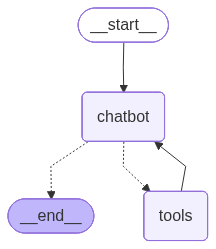

In [ ]:
# 엣지 연결
graph_builder.add_edge("tools", "chatbot") # 도구가 호출될 때마다 챗봇으로 돌아가 다음 단계를 결정
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()
graph

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}): # graph 노드 호출 결과 받아옴
        for value in event.values():
            print("Assistant:", value["messages"][-1].content) # AI 답변 출력

In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: 안녕
Assistant: 안녕하세요! 오늘은 무엇을 도와드릴까요?

예를 들면:
- 최신 정보 검색이나 요약
- 글쓰기, 번역, 문장 다듬기
- 코드 리뷰나 프로그래밍 문제 해결
- 아이디어 브레인스토밍

어떤 주제로 시작할까요?
User: q
Goodbye!


### 2-5. create_react_agent
create_react_agent는 LangChain에서 ReAct 패턴(Reason+Act)을 따르는 에이전트를 손쉽게 구성하는 팩토리로, LLM과 사용할 도구 목록, 그리고 적절한 프롬프트를 결합해 “생각→도구 호출→관찰→최종 답변”의 반복 루프를 수행하는 Agent 객체를 만들어줍니다. 이 에이전트는 질문을 해석해 필요한 도구를 선택하고 인자를 구성해 호출한 뒤, 결과를 반영해 다음 행동을 결정하며, 보통 AgentExecutor와 함께 실행하여 다단계 추론과 복수의 툴 호출을 자동으로 오케스트레이션합니다. 핵심은 프롬프트(지침), LLM, 툴 레지스트리(이름→함수/API), 출력 파서를 표준화해 붙여주는 것이며, OpenAI 스타일의 툴콜을 포함한 다양한 LLM과 호환되어 실용적인 “생각하며 도구를 쓰는” 에이전트를 빠르게 구성할 수 있게 해주는 점입니다.

In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-5-nano")
agent = create_react_agent(llm, tools)

In [ ]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is LangGraph?"}]})

In [ ]:
response

{'messages': [HumanMessage(content='What is LangGraph?', additional_kwargs={}, response_metadata={}, id='a07fba26-50c6-4439-9347-f4de3b2b4b0c'),
  AIMessage(content='LangGraph isn’t a single, universally defined term. It could refer to:\n\n- A general concept in NLP/linguistics: a graph-based representation of language data (e.g., nodes as words/lemmas/senses and edges as semantic or syntactic relationships).\n- A specific project, library, or product named “LangGraph” (e.g., a tool for building or visualizing language graphs, knowledge graphs for languages, etc.).\n\nDo you have a specific LangGraph in mind (a link, product page, or the context where you saw it)? If you’d like, I can look it up and give you a precise definition and use cases.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1359, 'prompt_tokens': 1354, 'total_tokens': 2713, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens'

# **3. 원하는 형태로 출력하는 챗봇**

In [ ]:
from pydantic import BaseModel, Field

In [ ]:
class MovieResponse(BaseModel):
    title: str = Field(description='영화 제목')
    direction: str = Field(description='감독 이름')
    genre: str = Field(description='장르')
    release_year: int = Field(description='개봉 연도')

In [ ]:
model = ChatOpenAI(model="gpt-5-nano")
model_with_structured_output = model.with_structured_output(MovieResponse)

model_with_structured_output.invoke('벌새 영화에 대해 설명해줘')

MovieResponse(title='벌새', direction='김보라', genre='드라마, 성장 영화', release_year=2019)

In [ ]:
from typing import Union

In [ ]:
class MovieResponse(BaseModel):
    title: str = Field(description='영화 제목')
    direction: str = Field(description='감독 이름')
    genre: str = Field(description='장르')
    release_year: int = Field(description='개봉 연도')

class ConversationalResponse(BaseModel):
    response: str = Field(description='사용자의 질문에 대해 친절하게 대화하듯이 답변하는 문장')

class FinalResponse(BaseModel):
    final_output: Union[MovieResponse, ConversationalResponse]

In [ ]:
structured_llm = model.with_structured_output(FinalResponse)
structured_llm.invoke('벌새 영화에 대해 설명해줘')

FinalResponse(final_output=ConversationalResponse(response='벌새는 한국의 독립영화로, 감독 보라 김의 데뷔작입니다. 한 소녀가 가족의 불안, 학교 생활, 친구 관계 속에서 자아를 찾아가는 과정을 느리고 섬세하게 따라갑니다. 기억과 현실이 겹치는 회상 장면들이 비선형적으로 제시되며, 도시의 평범한 풍경 속에서 작은 기쁨과 상처가 교차합니다. 주제는 가정의 긴장과 경제적 어려움, 여성의 성장과 자립, 기억의 소멸과 재구성, 그리고 사춘기라는 변곡점에서의 정체성 탐색입니다. 감독은 느린 템포의 샷과 자연광 사용, 잔잔한 음악과 섬세한 소리 디자인으로 내면의 감정을 축약 없이 드러냅니다. 비주얼은 은유와 상징으로 가득 차 있으며, 인물 간 관계의 미묘한 갈등을 조용히 보여줍니다. 관람 포인트는 주인공의 시선에 가까운 카메라 워크와, 기억의 조각들이 모여 하나의 서사를 이루는 방식입니다. 영화가 전하는 기억의 감정은 대화 없이도 충분히 전달됩니다. 혹시 배우, 러닝타임, 해외 수상 이력, 또는 어떤 플랫폼에서 볼 수 있는지 같은 구체적인 정보가 필요하면 말씀해 주세요.'))

In [ ]:
from langgraph.graph import MessagesState
from typing import Literal
from langchain_core.tools import tool

In [ ]:
class State(MessagesState):
    final_response: MovieResponse

In [ ]:
@tool
def get_movieinfo(movie: Literal['윤희에게', '소공녀']):
    """아래 설명은 영화에 대한 내용이야. 참고해줘"""
    if movie == '윤희에게':
        return "잊고 지냈던 첫사랑의 편지를 계기로, 딸과 함께 떠나는 감성적인 겨울 여행 이야기야."
    elif movie == '소공녀':
        return "내 집보다 내가 좋아하는 것들을 지키기 위해 떠나는 청춘의 소박하고도 당찬 독립기행이야."
    else:
        raise AssertionError("알 수 없는 영화")

In [ ]:
tools = [get_movieinfo]

model_with_tool = model.bind_tools(tools)

In [ ]:
def call_model(state: State):
    response = model_with_tool.invoke(state['messages'])
    return {'messages': [response]}

In [ ]:
from langchain_core.messages import HumanMessage

In [ ]:
model = ChatOpenAI(model="gpt-5-nano")
model_with_structured_output = model.with_structured_output(MovieResponse)

In [ ]:
def respond(state: State):
    # [-1]: AIMessage, [-2]: ToolMessage
    response = model_with_structured_output.invoke(
        [HumanMessage(content=state['messages'][-2].content)]
    )
    return {'final_response': response}

In [ ]:
def should_continue(state: State):
    messages = state['messages']
    last_message = messages[-1]
    if not last_message.tool_calls:
        return "respond"
    else:
        return "continue"

In [ ]:
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode

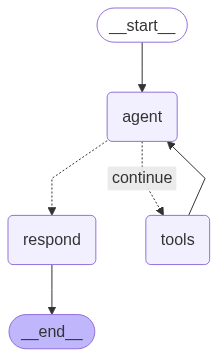

In [ ]:
graph_builder = StateGraph(State)

graph_builder.add_node("agent", call_model)
graph_builder.add_node("respond", respond)
graph_builder.add_node("tools", ToolNode(tools))

graph_builder.set_entry_point("agent")
graph_builder.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",
        "respond": "respond"
    }
)

graph_builder.add_edge("tools", "agent")
graph_builder.add_edge("respond", END)
graph = graph_builder.compile()
graph

In [ ]:
answer = graph.invoke(input={"messages": [("human", "윤희에게 영화에 대해 알려줘")]})[
    "final_response"
]

answer

MovieResponse(title='겨울의 편지와 함께 걷다', direction='정수영', genre='감성 드라마, 가족, 로맨스', release_year=2025)



---



In [ ]:
!pip install arxiv

In [ ]:
from langchain_community.utilities import ArxivAPIWrapper

In [ ]:
arxiv = ArxivAPIWrapper()
docs = arxiv.run("1706.03762")